Loading packages

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scqubits as sq
import scipy.constants as const
import matplotlib.pyplot as plt

# Fluxonium

In [39]:
fluxonium_parameters= {
    'EJ':   10,
    'EC':   1.81,
    'EL':   0.369,
}

flux_array = np.linspace(-0.5, 0.5, 1001)

#Fluxonium definition
fluxonium = sq.Fluxonium(**fluxonium_parameters,flux =0,cutoff=40)

#Obtain energy levels and matrix elements
spectrum_data = fluxonium.get_matelements_vs_paramvals(
    operator='phi_operator',
    param_name='flux',
    param_vals=flux_array,
    evals_count=6
)

# Obtain the energy levels.
evals_matrix = spectrum_data.energy_table

#Obtain the transition energies from the state 0, 1 and 2
transitions0 = evals_matrix - evals_matrix[:,0].reshape(-1,1)
transitions1 = evals_matrix - evals_matrix[:,1].reshape(-1,1)
transitions2 = evals_matrix - evals_matrix[:,2].reshape(-1,1)

# Erasing 'transition from i to i'
transitions0 = np.delete(transitions0,0,axis=1)
transitions1 = np.delete(transitions1,[0,1],axis=1)
transitions2 = np.delete(transitions2,[0,1,2],axis=1)

#Obtain the matrix elements.
matrix_element = spectrum_data.matrixelem_table
transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

# Erasing 'matrix element from i to i'
transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)

Spectral data:   0%|          | 0/1001 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\varphi$', ylabel='Re $\\psi_j(\\varphi)$,  energy [GHz]'>)

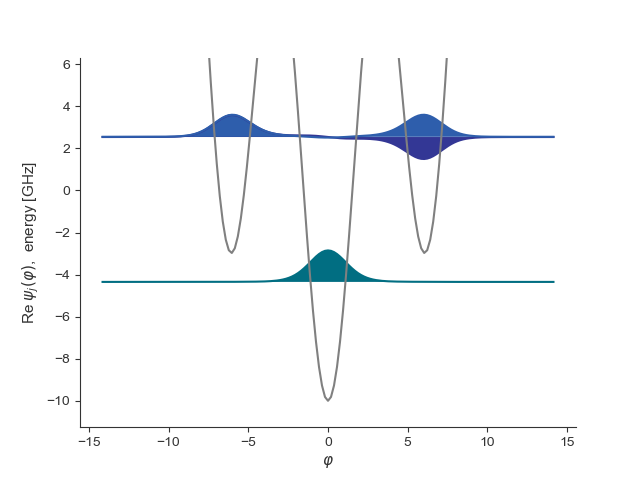

In [41]:
fluxonium.plot_wavefunction(which=[0,1,2])

## Plot energy transitions

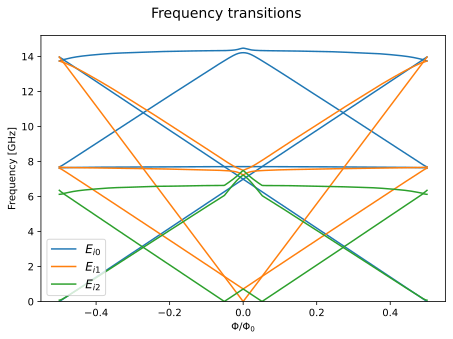

In [13]:
# %matplotlib widget #Uncomment this if you want to have a interactive image.

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency transitions', fontsize = 14)
ax.plot(flux_array,transitions0,color='C0')
ax.plot(flux_array,transitions1,color='C1')
ax.plot(flux_array,transitions2,color='C2')

ax.plot([], [], color='C0', label=r'$E_{i0}$')
ax.plot([], [], color='C1', label=r'$E_{i1}$')
ax.plot([], [], color='C2', label=r'$E_{i2}$')
ax.set_ylim(bottom=0)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()

# Fluxonium + Resonator

In [76]:
fluxonium_parameters= {
    'EJ':   12.11,
    'EC':   1.42,
    'EL':   0.362,
}

EJ,EC,EL = fluxonium_parameters['EJ'], fluxonium_parameters['EC'], fluxonium_parameters['EL']

#Obtain the shared EL and the resonator EL from the fluxonium EL.
EL_fluxonium = EL*134/(134-14)
EL_shared = EL*134/14
EL_resonator = EL*134/(152+14)
resonator_frequency = 6.137
EC_resonator = resonator_frequency**2/8/EL_resonator

flux_res_dict_marcelo = f"""
branches:
- ["JJ", 0,1, {EJ}, {EC}]
- ["L", 1,2, {EL_fluxonium}]
# Coupling inductance
- ["L", 2,0, {EL_shared}]
# JJA resonator
- ["C", 0,3, {EC_resonator}]
- ["L", 3,2, {EL_resonator}]
"""

fluxonium_resonator_marcelo = sq.Circuit(
    input_string=flux_res_dict_marcelo,
    from_file=None,
    ext_basis='harmonic',
    truncated_dim= 20
)

fluxonium_resonator_marcelo.cutoff_ext_1 = 30


flux1_array = np.linspace(-0.5,0.5,101)

spectrumData_fluxres_marcelo = fluxonium_resonator_marcelo.get_spectrum_vs_paramvals(
    param_name='Φ1',
    param_vals=flux1_array,
    evals_count=10
)

# Test

# flux_res_dict_joan = f"""
# branches:
# - ["JJ", 1,2, {EJ}, {EC}]
# - ["L", 2,3, {EL_fluxonium}]
# # Coupling inductance
# - ["L", 3,1, {EL_shared}]
# # JJA resonator
# - ["C", 1,4, {EC_resonator}]
# - ["L", 4,3, {EL_resonator}]
# """

# fluxonium_resonator_joan = sq.Circuit(
#     input_string=flux_res_dict_joan,
#     from_file=None,
#     ext_basis='harmonic',
#     truncated_dim= 20
# )

# spectrumData_fluxres_joan = fluxonium_resonator_joan.get_spectrum_vs_paramvals(
#     param_name='Φ1',
#     param_vals=flux1_array,
#     evals_count=10
# )

# spectrumData_fluxres = fluxonium_resonator.get_matelements_vs_paramvals(
#     operator='θ2_operator',
#     param_name='Φ1',
#     param_vals=flux1_array,
#     evals_count=10)

# spectra_fluxres = spectrumData_fluxres.energy_table

# transitions0 = spectra_fluxres - spectra_fluxres[:,0].reshape(-1,1)
# transitions1 = spectra_fluxres - spectra_fluxres[:,1].reshape(-1,1)
# transitions2 = spectra_fluxres - spectra_fluxres[:,2].reshape(-1,1)

# transitions0 = np.delete(transitions0,0,axis=1)
# transitions1 = np.delete(transitions1,[0,1],axis=1)
# transitions2 = np.delete(transitions2,[0,1,2],axis=1)


# matrix_element = spectrumData_fluxres.matrixelem_table
# transition0_matrix_element = np.abs(matrix_element[:,:,0])**2
# transition1_matrix_element = np.abs(matrix_element[:,:,1])**2
# transition2_matrix_element = np.abs(matrix_element[:,:,2])**2

# transition0_matrix_element = np.delete(transition0_matrix_element,0,axis=1)
# transition1_matrix_element = np.delete(transition1_matrix_element,[0,1],axis=1)
# transition2_matrix_element = np.delete(transition2_matrix_element,[0,1,2],axis=1)


# max0_matrix_elem = np.max(transition0_matrix_element)
# max1_matrix_elem = np.max(transition1_matrix_element)
# max2_matrix_elem = np.max(transition2_matrix_element)
# max_val = max(max0_matrix_elem, max1_matrix_elem, max2_matrix_elem)

Spectral data:   0%|          | 0/101 [00:00<?, ?it/s]

## Plot energy levels

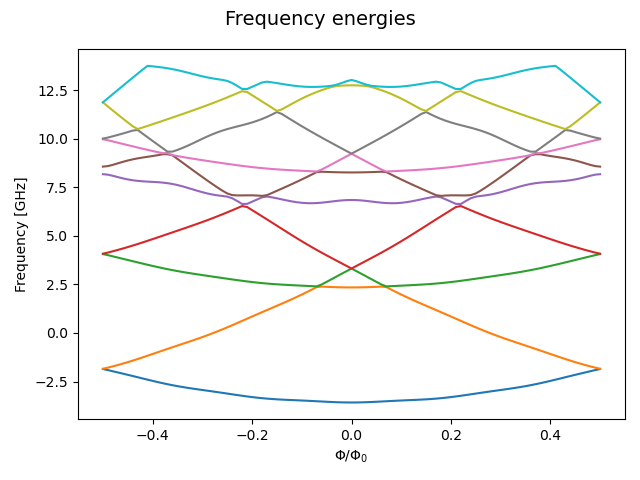

In [75]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
spectra_fluxres_marcelo = spectrumData_fluxres_marcelo.energy_table
spectra_fluxres_joan = spectrumData_fluxres_joan.energy_table
fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres_marcelo)
# ax.plot(flux1_array,spectra_fluxres_joan, color='C1')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

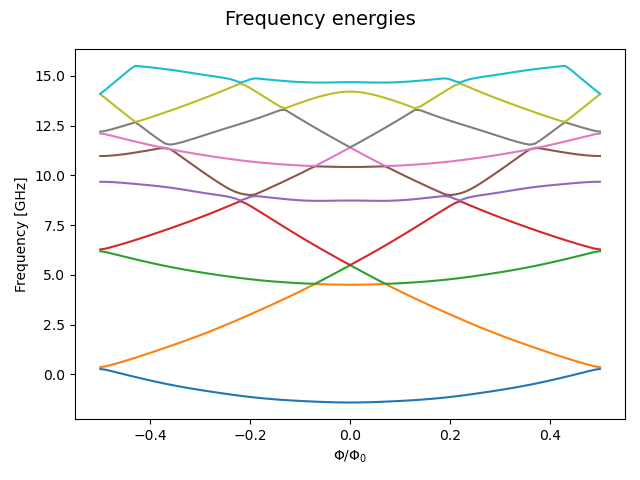

In [ ]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

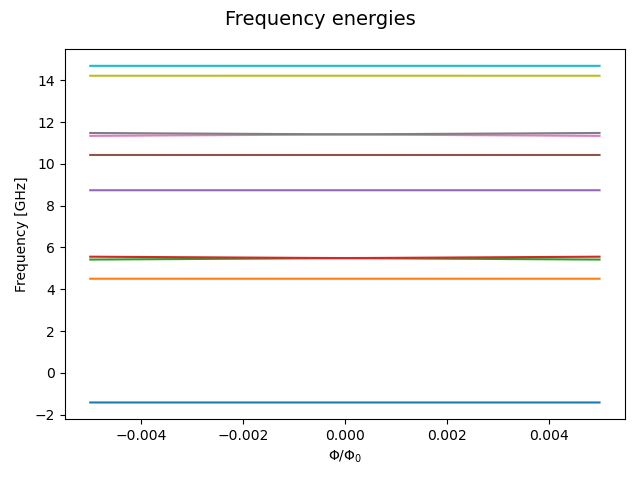

In [17]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
fig.suptitle('Frequency energies', fontsize = 14)
ax.plot(flux1_array,spectra_fluxres)
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()

## Dispersive shift

In [69]:
Eg0_1_joan = spectra_fluxres_joan[:,0]

Ee0_1_joan = spectra_fluxres_joan[:,2]
Ef0_1_joan = spectra_fluxres_joan[:,3]

Eg1_1_joan = spectra_fluxres_joan[:,1]
Ee1_1_joan = spectra_fluxres_joan[:,6]
Ef1_1_joan = spectra_fluxres_joan[:,7]

Ee0_2_joan = spectra_fluxres_joan[:,1]
Eg1_2_joan = spectra_fluxres_joan[:,2]
Ee1_2_joan = spectra_fluxres_joan[:,5]

dispersive_shift_01_1_joan = ((Ee1_1_joan - Ee0_1_joan) - (Eg1_1_joan - Eg0_1_joan))/2
dispersive_shift_01_2_joan = ((Ee1_2_joan - Ee0_2_joan) - (Eg1_2_joan - Eg0_1_joan))/2
dispersive_shift_02_1_joan = ((Ef1_1_joan - Ef0_1_joan) - (Eg1_1_joan - Eg0_1_joan))/2

Eg0_1_marcelo = spectra_fluxres_marcelo[:,0]

Ee0_1_marcelo = spectra_fluxres_marcelo[:,2]
Ef0_1_marcelo = spectra_fluxres_marcelo[:,3]

Eg1_1_marcelo = spectra_fluxres_marcelo[:,1]
Ee1_1_marcelo = spectra_fluxres_marcelo[:,6]
Ef1_1_marcelo = spectra_fluxres_marcelo[:,7]

Ee0_2_marcelo = spectra_fluxres_marcelo[:,1]
Eg1_2_marcelo = spectra_fluxres_marcelo[:,2]
Ee1_2_marcelo = spectra_fluxres_marcelo[:,5]

dispersive_shift_01_1_marcelo = ((Ee1_1_marcelo - Ee0_1_marcelo) - (Eg1_1_marcelo - Eg0_1_marcelo))/2
dispersive_shift_01_2_marcelo = ((Ee1_2_marcelo - Ee0_2_marcelo) - (Eg1_2_marcelo - Eg0_1_marcelo))/2
dispersive_shift_02_1_marcelo = ((Ef1_1_marcelo - Ef0_1_marcelo) - (Eg1_1_marcelo - Eg0_1_marcelo))/2

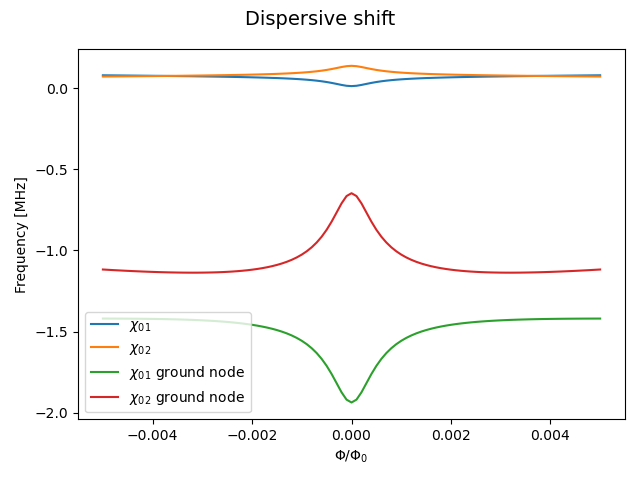

In [70]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)
ax.plot(flux1_array,dispersive_shift_01_1_joan*1e3, label = r'$\chi_{01}$')
# ax.plot(flux1_array,dispersive_shift_01_2_joan*1e3, label = r'$\chi_{01}$')
ax.plot(flux1_array,dispersive_shift_02_1_joan*1e3, label = r'$\chi_{02}$')

ax.plot(flux1_array,dispersive_shift_01_1_marcelo*1e3, label = r'$\chi_{01}$ ground node')
# ax.plot(flux1_array,dispersive_shift_01_2_marcelo*1e3, label = r'$\chi_{01}$ ground node')
ax.plot(flux1_array,dispersive_shift_02_1_marcelo*1e3, label = r'$\chi_{02}$ ground node')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

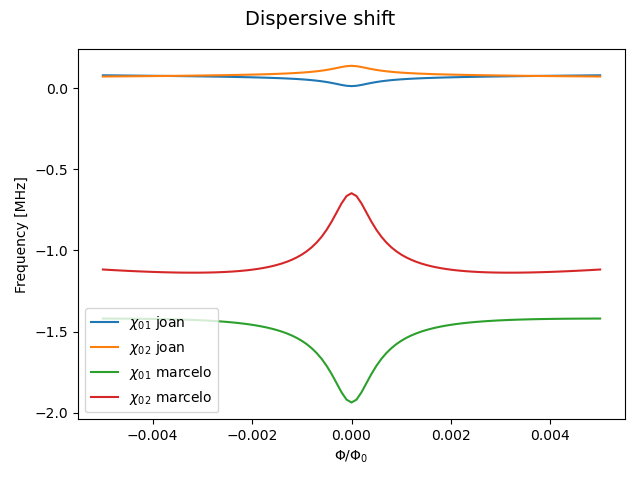

In [ ]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline
%matplotlib widget
fig,ax = plt.subplots(1,1)
fig.suptitle('Dispersive shift', fontsize = 14)
ax.plot(flux1_array,dispersive_shift_01_1_joan*1e3, label = r'$\chi_{01}$ joan')
# ax.plot(flux1_array,dispersive_shift_01_2_joan*1e3, label = r'$\chi_{01}$ joan')
ax.plot(flux1_array,dispersive_shift_02_1_joan*1e3, label = r'$\chi_{02}$ joan')

ax.plot(flux1_array,dispersive_shift_01_1_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
# ax.plot(flux1_array,dispersive_shift_01_2_marcelo*1e3, label = r'$\chi_{01}$ marcelo')
ax.plot(flux1_array,dispersive_shift_02_1_marcelo*1e3, label = r'$\chi_{02}$ marcelo')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [MHz]')
ax.legend()
fig.tight_layout()
plt.show()

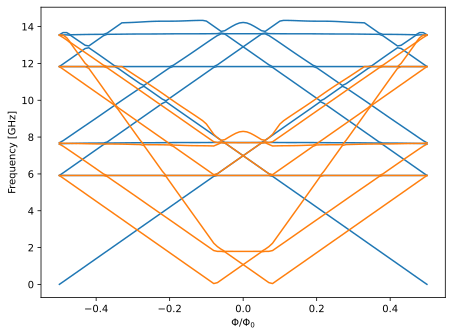

In [22]:
# %matplotlib widget #Uncomment this if you want to have a interactive image. By default it's %matplotlib inline

fig,ax = plt.subplots(1,1)
ax.plot(flux1_array,transitions0, color='C0')
ax.plot(flux1_array,transitions1, color='C1')
ax.set_xlabel(r'$\Phi/\Phi_0$')
ax.set_ylabel(r'Frequency [GHz]')
fig.tight_layout()
plt.show()